In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [250]:
df= pd.read_csv(r'data/meddra_all_indications.tsv',skipinitialspace=True)

In [251]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,01-06-09,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [252]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [254]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [255]:
df.shape

(362806, 12)

In [256]:
df.isnull().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41868
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [257]:
df=df.drop(labels=df[df.Condition=='Other'].index,axis=0)

In [258]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df,'Sex')


,Total,Percentage
Female,203257,64.93
Male,85350,27.26
NaN,24434,7.81


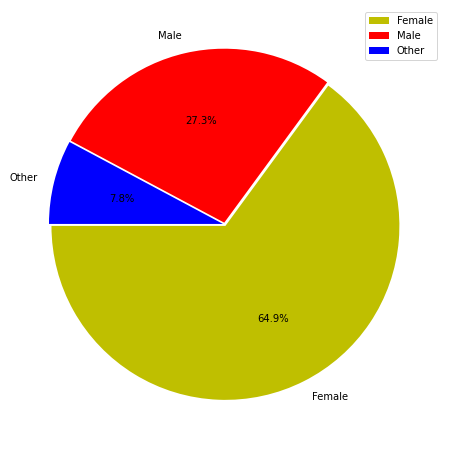

In [259]:
import matplotlib.pyplot as plt
y =count_values_in_column(df,'Sex')
y=y['Total']
plt.figure(figsize=(8,8))
mylabels = ["Female", "Male", "Other",]

plt.pie(y, labels = mylabels, startangle=180,colors=['y','r','b'],autopct='%1.1f%%',explode=[0.01, 0.01, 0.01])
plt.legend()
plt.show() 

In [260]:
#Missing value imputation for categorical vlaue
#Get the object columns

#Age
obj_columns1=df[['Age']]

In [261]:
df.Age.mode()

0    45-54
dtype: object

In [262]:

obj_columns1 = obj_columns1.fillna(obj_columns1.mode().iloc[0])

In [263]:
df.Reviews.mode()

0    this treatment is awsome.  I love drugs.
dtype: object

In [264]:
#Reviews
obj_columns2 = df[['Reviews']]

In [265]:
obj_columns2 = obj_columns2.fillna(obj_columns2.mode().iloc[0])

In [266]:
#Sex
obj_columns3 = df[['Sex']]

In [267]:
df.Sex.mode()

0    Female
dtype: object

In [268]:
obj_columns3 = obj_columns3.fillna(obj_columns3.mode().iloc[0])

In [269]:
#Sides 
obj_columns4 = df[['Sides']]

In [270]:
df.Sides.mode()

0    Nausea ,  vomiting ,  constipation ,  lighthea...
dtype: object

In [271]:
obj_columns4 = obj_columns4.fillna(obj_columns4.mode().iloc[0])

In [272]:
#Condition
obj_columns5 = df[['Condition']]

In [273]:
df.Condition.mode()

0    Pain
dtype: object

In [274]:
obj_columns5 = obj_columns5.fillna(obj_columns5.mode().iloc[0])

In [275]:
#Join the data set with imputed object dataset
data_cleaned=pd.concat([df,obj_columns1,obj_columns2,obj_columns3,obj_columns4,obj_columns5],axis=1)

In [276]:
print('Original Data set shape',df.shape),
print('Cleaed Data set shape',data_cleaned.shape)


Original Data set shape (313041, 12)
Cleaed Data set shape (313041, 17)


In [277]:
data_cleaned.isnull().sum()

Age              10283
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          37872
Satisfaction         0
Sex              24434
Sides            10992
UsefulCount          0
Age                  0
Reviews              0
Sex                  0
Sides                0
Condition            0
dtype: int64

In [278]:
 data_cleaned = data_cleaned.dropna(how = 'any', axis = 1)

In [279]:
print('Original Data set shape',df.shape),
print('Cleaed Data set shape',data_cleaned.shape)

Original Data set shape (313041, 12)
Cleaed Data set shape (313041, 12)


In [280]:
data_cleaned.isnull().sum()

Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Age              0
Reviews          0
Sex              0
Sides            0
Condition        0
dtype: int64

In [281]:
data_cleaned.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,313041.000000,313041.000000,313041.000000,313041.000000,313041.000000
mean,36199.384934,4.038062,3.556033,3.148850,6.879463
std,52305.060347,1.302102,1.440720,1.604141,9.390988
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4822.000000,3.000000,3.000000,1.000000,1.000000
50%,8880.000000,5.000000,4.000000,3.000000,4.000000
75%,63164.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,6.000000,6.000000,6.000000,222.000000


In [282]:
data_cleaned['Age'].unique()

array(['75 or over', '25-34', '45-54', '55-64', '19-24', '35-44', '13-18',
       '65-74', '07-Dec', '0-2', '03-Jun'], dtype=object)

In [283]:
data_cleaned['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [284]:
data_cleaned['Age'] = data_cleaned['Age'].map({'0-2': 1, 
                                               '03-Jun': 2,
                                               '07-Dec': 3,
                                               '13-18': 4,
                                               '19-24': 5,
                                               '25-34': 6,
                                               '35-44': 7,
                                               '45-54': 8,
                                               '55-64': 9,
                                               '65-74': 10,
                                               '75 or over':11}).astype(int)


data_cleaned['Sex'] = data_cleaned['Sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [285]:
# Converting the date in to date time format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [286]:
data_cleaned.dtypes

Date             datetime64[ns]
Drug                     object
DrugId                    int64
EaseofUse                 int64
Effectiveness             int64
Satisfaction              int64
UsefulCount               int64
Age                       int32
Reviews                  object
Sex                       int32
Sides                    object
Condition                object
dtype: object

In [287]:
df.Reviews.value_counts().head(5)

this treatment is awsome.  I love drugs.                                                                                                                                                                                                                                                                                  172
good                                                                                                                                                                                                                                                                                                                      164
This drug is awesome.  I love drugs.                                                                                                                                                                                                                                                                                      128
No Script or health Insurance needed to place 

In [288]:
#df1.Reviews.value_counts().head(5)

In [289]:
# Remove the Drugs whose counts is less than 5 i.e. removed[1,2,3,4,5] 
from collections import Counter
counts = data_cleaned['Drug'].value_counts()

df1 = data_cleaned[~df['Drug'].isin(counts[counts < 6].index)]

In [290]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307072 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           307072 non-null  datetime64[ns]
 1   Drug           307072 non-null  object        
 2   DrugId         307072 non-null  int64         
 3   EaseofUse      307072 non-null  int64         
 4   Effectiveness  307072 non-null  int64         
 5   Satisfaction   307072 non-null  int64         
 6   UsefulCount    307072 non-null  int64         
 7   Age            307072 non-null  int32         
 8   Reviews        307072 non-null  object        
 9   Sex            307072 non-null  int32         
 10  Sides          307072 non-null  object        
 11  Condition      307072 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(5), object(4)
memory usage: 28.1+ MB


In [291]:
print('Original Data set shape',df.shape),
print('Data set with no NA values',data_cleaned.shape)
print('Data set with Review count>2',df1.shape),


Original Data set shape (313041, 12)
Data set with no NA values (313041, 12)
Data set with Review count>2 (307072, 12)


(None,)

In [292]:
df.Drug.value_counts()

lisinopril                   4158
lisinopril solution          4158
cymbalta                     4134
lexapro                      3890
hydrocodone-acetaminophen    3818
                             ... 
trinessa lo                     1
iron 100 plus                   1
stalevo 125                     1
vitamin and minerals            1
keralac cream                   1
Name: Drug, Length: 5641, dtype: int64

In [293]:
# originaly there was 7093 Drugs now the availble Drugs are 3213
df1.Drug.value_counts()

lisinopril solution                                                   4158
lisinopril                                                            4158
cymbalta                                                              4134
lexapro                                                               3890
hydrocodone-acetaminophen                                             3818
                                                                      ... 
robinul                                                                  6
tenofovir disoproxil fumarate 40 mg/scoop (40 mg/gram) oral powder       6
tygacil vial                                                             6
nicotrol ns spray, non-aerosol                                           6
ezetimibe-simvastatin tablet                                             6
Name: Drug, Length: 2779, dtype: int64

In [294]:
df.Drug.value_counts()

lisinopril                   4158
lisinopril solution          4158
cymbalta                     4134
lexapro                      3890
hydrocodone-acetaminophen    3818
                             ... 
trinessa lo                     1
iron 100 plus                   1
stalevo 125                     1
vitamin and minerals            1
keralac cream                   1
Name: Drug, Length: 5641, dtype: int64

In [295]:
df1.Drug.value_counts().nlargest(10)

lisinopril solution          4158
lisinopril                   4158
cymbalta                     4134
lexapro                      3890
hydrocodone-acetaminophen    3818
effexor xr                   3290
tramadol hcl er              2768
tramadol hcl                 2768
zoloft                       2384
lyrica                       2356
Name: Drug, dtype: int64

In [296]:
df1.Drug.value_counts().nsmallest(10)

obtrex dha                                             6
calan sr                                               6
marplan                                                6
viroptic drops                                         6
onfi                                                   6
juluca                                                 6
nitroglycerin 400 mcg sublingual powder in a packet    6
trandolapril                                           6
pioglitazone-metformin                                 6
bydureon bcise auto-injector                           6
Name: Drug, dtype: int64

In [297]:
df1['Satisfaction'].value_counts()

5    93820
1    83835
4    54465
3    44578
2    30372
6        2
Name: Satisfaction, dtype: int64

In [298]:
df1['Effectiveness'].value_counts()

5    110620
4     70652
3     51730
1     47821
2     26247
6         2
Name: Effectiveness, dtype: int64

In [299]:
df1['EaseofUse'].value_counts()

5    164110
4     64047
3     34841
1     28906
2     15166
6         2
Name: EaseofUse, dtype: int64

In [301]:
ls=[df1[df1['Satisfaction']==10],df1[df1['Satisfaction']==6],df1[df1['Effectiveness']==10],df1[df1['Effectiveness']==6],df1[df1['EaseofUse']==10],df1[df1['EaseofUse']==6]]
for i in ls:
    df1=df1.drop(labels=i.index,axis=0) 
    


In [302]:
print('Original Data set shape',df.shape),
print('Data set with no NA values',data_cleaned.shape)
print('Data set with Review count>5',df1.shape)

Original Data set shape (313041, 12)
Data set with no NA values (313041, 12)
Data set with Review count>5 (307070, 12)


In [303]:
df1.Reviews.mode()

0    this treatment is awsome.  I love drugs.
dtype: object

In [304]:
df1[df1.Reviews=='good']

,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Age,Reviews,Sex,Sides,Condition
3879,2010-02-03,low-ogestrel,17509,4,4,4,0,5,good,1,"Nausea , vomiting , headache , bloating , ...",Abnormally Long or Heavy Periods
4082,2011-05-28,lovenox syringe,1837,4,5,5,0,9,good,0,"Mild irritation, pain, bruising, redness, and ...",Blood Clot in a Deep Vein
5155,2009-08-24,lotrel,16188,5,5,5,0,10,good,0,Dizziness or light-headedness may occur as yo...,High Blood Pressure
6664,2011-05-29,lorazepam concentrate,8892,5,5,5,1,9,good,0,"Drowsiness, dizziness , loss of coordination,...",Anxious
6720,2013-12-16,losartan potassium,6616,5,5,5,0,8,good,0,Dizziness or lightheadedness may occur as y...,Hypertension with Left Ventricular Hypertrophy
...,...,...,...,...,...,...,...,...,...,...,...,...
351859,2010-01-23,crestor,76704,5,3,5,0,9,good,0,"Nausea , vomiting , constipation , lighthea...",Homozygous Inherited High Blood Cholesterol
353877,2014-01-05,carboxymethylcellulose sodium drops,18521,4,4,5,0,8,good,0,Vision may be temporarily blurred when this p...,Drying and Inflammation of Cornea and Conjunct...
353882,2012-06-23,carboxymethylcellulose sodium drops,18521,3,3,3,2,7,good,0,Vision may be temporarily blurred when this p...,Dry Eye
355292,2013-02-27,capzasin-hp cream,61857,3,4,3,0,5,good,0,"Warmth, stinging, or burning on the applicatio...",Backache


In [305]:
df.Reviews.value_counts()

this treatment is awsome.  I love drugs.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   172
good                                                                                                                                                                                                                     

In [306]:
df1[df1.Reviews=='this treatment is awsome.  I love drugs.']

,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Age,Reviews,Sex,Sides,Condition
77,2012-07-27,lysteda,154120,4,4,4,1,8,this treatment is awsome. I love drugs.,1,"Nausea , vomiting , diarrhea , and muscle p...",Abnormally Long or Heavy Periods
173,2010-08-18,lysteda,154120,4,3,3,5,7,this treatment is awsome. I love drugs.,1,"Nausea , vomiting , diarrhea , and muscle p...",Abnormally Long or Heavy Periods
199,2019-04-16,lyrica,93965,1,1,1,0,9,this treatment is awsome. I love drugs.,1,"Drowsiness, dizziness , dry mouth , constip...",Repeated Episodes of Anxiety
209,2018-03-13,lyrica,93965,4,2,4,11,8,this treatment is awsome. I love drugs.,1,"Drowsiness, dizziness , dry mouth , constip...",Neuropathic Pain
219,2017-07-31,lyrica,93965,5,4,4,14,8,this treatment is awsome. I love drugs.,0,"Drowsiness, dizziness , dry mouth , constip...",Neuropathic Pain
...,...,...,...,...,...,...,...,...,...,...,...,...
362571,2010-01-19,chantix,144470,5,5,3,0,8,this treatment is awsome. I love drugs.,1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362579,2010-01-09,chantix,144470,1,1,1,1,8,this treatment is awsome. I love drugs.,1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362580,2010-01-08,chantix,144470,2,2,2,0,7,this treatment is awsome. I love drugs.,0,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362586,2009-12-23,chantix,144470,5,3,2,0,7,this treatment is awsome. I love drugs.,0,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking


In [307]:
#df.Reviews.isnull().sum()
#df.Reviews.isin(df.Reviews.isnull().index)
df[df['Reviews'].isnull()].index.tolist()

[8,
 37,
 77,
 173,
 199,
 209,
 219,
 240,
 312,
 350,
 353,
 370,
 384,
 385,
 391,
 405,
 430,
 443,
 447,
 450,
 452,
 463,
 466,
 467,
 482,
 499,
 512,
 528,
 532,
 536,
 543,
 547,
 550,
 573,
 587,
 592,
 602,
 603,
 613,
 622,
 634,
 638,
 643,
 646,
 648,
 659,
 688,
 692,
 702,
 715,
 725,
 731,
 736,
 747,
 751,
 752,
 766,
 792,
 804,
 811,
 816,
 824,
 831,
 838,
 846,
 878,
 889,
 892,
 901,
 902,
 905,
 909,
 912,
 931,
 947,
 961,
 967,
 971,
 980,
 983,
 992,
 993,
 1016,
 1045,
 1048,
 1078,
 1082,
 1086,
 1093,
 1094,
 1107,
 1124,
 1128,
 1129,
 1133,
 1154,
 1165,
 1168,
 1179,
 1190,
 1191,
 1192,
 1197,
 1200,
 1219,
 1273,
 1299,
 1304,
 1310,
 1312,
 1330,
 1338,
 1354,
 1379,
 1381,
 1431,
 1444,
 1456,
 1460,
 1469,
 1520,
 1525,
 1526,
 1535,
 1550,
 1559,
 1563,
 1587,
 1589,
 1599,
 1603,
 1605,
 1614,
 1618,
 1634,
 1643,
 1691,
 1707,
 1720,
 1789,
 1798,
 1845,
 1848,
 1857,
 1866,
 1869,
 1877,
 1937,
 1938,
 1973,
 1994,
 2005,
 2008,
 2013,
 2028,
 

In [308]:
df1.loc[df1.Reviews=='good','Drug'].value_counts()#.tolist()

oxycodone-acetaminophen                         4
metformin hcl                                   4
metformin hcl solution                          4
hydrocodone-acetaminophen                       4
metformin hcl er                                4
                                               ..
synthroid                                       1
morphine sulfate er tablet, extended release    1
celebrex                                        1
debacterol swab, medicated                      1
morphine sulfate er                             1
Name: Drug, Length: 118, dtype: int64

In [309]:
df.iloc[77,]

Age                                                          35-44
Condition                         Abnormally Long or Heavy Periods
Date                                                     6/19/2012
Drug                                                       lysteda
DrugId                                                      154120
EaseofUse                                                        5
Effectiveness                                                    5
Reviews          I am 37 years old and have been diagnosed with...
Satisfaction                                                     5
Sex                                                         Female
Sides            Nausea ,  vomiting ,  diarrhea , and  muscle p...
UsefulCount                                                     17
Name: 84, dtype: object

In [310]:
df[df.Drug=='lysteda']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
31,45-54,Abnormally Long or Heavy Periods,11/20/2019,lysteda,154120,4,4,"51 yr old with multiple fibroids, not ready fo...",4,NaN,"Nausea , vomiting , diarrhea , and muscle p...",0
32,45-54,Abnormally Long or Heavy Periods,06-03-19,lysteda,154120,1,1,This drug is very dangerous. I experienced al...,1,Female,"Nausea , vomiting , diarrhea , and muscle p...",1
33,45-54,Abnormally Long or Heavy Periods,04-06-19,lysteda,154120,5,5,I am currently taking Lysteda but can only tak...,4,NaN,"Nausea , vomiting , diarrhea , and muscle p...",0
34,55-64,Abnormally Long or Heavy Periods,2/23/2018,lysteda,154120,4,4,I used this drug while I was going through men...,4,NaN,"Nausea , vomiting , diarrhea , and muscle p...",2
35,35-44,Abnormally Long or Heavy Periods,9/24/2017,lysteda,154120,4,4,"I am an elementary teacher, so needing to go t...",5,NaN,"Nausea , vomiting , diarrhea , and muscle p...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
171,25-34,Abnormally Long or Heavy Periods,8/23/2010,lysteda,154120,5,5,Finally a product that works for me! Easy to u...,5,Female,"Nausea , vomiting , diarrhea , and muscle p...",11
172,35-44,Abnormally Long or Heavy Periods,8/20/2010,lysteda,154120,5,5,Within 2 days I only had to use a pantyliner. ...,5,Female,"Nausea , vomiting , diarrhea , and muscle p...",13
173,35-44,Abnormally Long or Heavy Periods,8/18/2010,lysteda,154120,4,3,NaN,3,Female,"Nausea , vomiting , diarrhea , and muscle p...",5
174,35-44,Abnormally Long or Heavy Periods,08-09-10,lysteda,154120,3,2,"I took this drug as prescribed, 6 pills a day ...",2,Female,"Nausea , vomiting , diarrhea , and muscle p...",9


In [311]:
df[df.Drug=='chantix']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
361599,45-54,Stop Smoking,01-12-20,chantix,144470,5,5,152 days free from those white sticks I used ...,5,NaN,"Nausea , headache , vomiting , drowsiness, g...",2
361600,55-64,Stop Smoking,12/18/2019,chantix,144470,5,5,I used Chantix to quit smoking as prescribed b...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
361602,55-64,Stop Smoking,12-12-19,chantix,144470,5,5,I have quit this time for 1 year while taking ...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
361606,35-44,Stop Smoking,12-09-19,chantix,144470,1,1,My e held me at gun point being on this drug,1,Female,"Nausea , headache , vomiting , drowsiness, g...",1
361610,45-54,Stop Smoking,11/13/2019,chantix,144470,5,5,"I quit using the 1 week method, I have been 93...",5,NaN,"Nausea , headache , vomiting , drowsiness, g...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
362800,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,"I goofed,it was june 16th of 2007 that I had m...",5,NaN,"Nausea , headache , vomiting , drowsiness, g...",0
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [312]:
df[df.Drug=='hydrocodone-acetaminophen']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
285648,NaN,Pain,2/29/2020,hydrocodone-acetaminophen,251,5,5,No Script or health Insurance needed to place ...,5,NaN,"Nausea , vomiting , constipation , lighthea...",19
285663,25-34,Pain,2/22/2020,hydrocodone-acetaminophen,251,3,3,THIS,4,NaN,"Nausea , vomiting , constipation , lighthea...",0
285671,65-74,Pain,2/18/2020,hydrocodone-acetaminophen,251,5,3,NaN,2,Female,"Nausea , vomiting , constipation , lighthea...",0
285680,55-64,Pain,1/17/2020,hydrocodone-acetaminophen,251,1,1,If the medication is from Mallickrodt don't ev...,1,NaN,"Nausea , vomiting , constipation , lighthea...",9
285688,65-74,Pain,01-06-20,hydrocodone-acetaminophen,251,5,5,I have been taking 10/325 mg HYDROCO/ACETAM fo...,5,Female,"Nausea , vomiting , constipation , lighthea...",6
...,...,...,...,...,...,...,...,...,...,...,...,...
290227,13-18,Pain,3/14/2009,hydrocodone-acetaminophen,251,5,3,NaN,3,Male,"Nausea , vomiting , constipation , lighthea...",0
290228,55-64,Pain,3/14/2009,hydrocodone-acetaminophen,251,5,5,i took darvocet for 15 years and have had 4 ba...,5,Female,"Nausea , vomiting , constipation , lighthea...",5
290229,35-44,Pain,3/13/2009,hydrocodone-acetaminophen,251,1,4,I have low back pain. the pain is also in my h...,4,Female,"Nausea , vomiting , constipation , lighthea...",5
290230,19-24,Pain,3/13/2009,hydrocodone-acetaminophen,251,4,3,I fractured two or my lumbar vertebrae in my l...,3,Male,"Nausea , vomiting , constipation , lighthea...",3


In [313]:
df1

,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Age,Reviews,Sex,Sides,Condition
0,2014-09-21,25dph-7.5peh,146724,5,5,5,0,11,I'm a retired physician and of all the meds I ...,0,"Drowsiness, dizziness , dry mouth /nose/thro...",Stuffy Nose
1,2011-01-13,25dph-7.5peh,146724,5,5,5,1,6,cleared me right up even with my throat hurtin...,1,"Drowsiness, dizziness , dry mouth /nose/thro...",Cold Symptoms
9,2012-10-29,"12 hour nasal relief spray, non-aerosol",9800,4,2,2,0,9,The 12 hour spray only works for me for 6 hours.,0,"Temporary burning, stinging, dryness in the no...",Stuffy Nose
11,2018-11-17,lyza,164750,5,5,2,0,5,Taking Lyza made me break out HORRIBLY. I trie...,1,"Nausea , vomiting , headache , bloating , ...",Birth Control
12,2018-07-03,lyza,164750,2,1,1,0,8,This stuff needs to be removed from the market...,1,"Nausea , vomiting , headache , bloating , ...",Birth Control
...,...,...,...,...,...,...,...,...,...,...,...,...
362800,2008-11-14,chantix,144470,5,5,5,0,9,"I goofed,it was june 16th of 2007 that I had m...",1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362801,2008-11-14,chantix,144470,5,5,5,2,9,I took the whole 12 weeks.I could have stopped...,1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362803,2008-11-13,chantix,144470,2,4,2,3,6,"As long as I was on chantix, I didn't smoke. ...",1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362804,2008-11-13,chantix,144470,5,5,5,1,9,Started this medication Oct 5th 2008. Haven't ...,0,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking


In [314]:
df_proc=df1.iloc[237070:,]

In [315]:
df_proc

,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Age,Reviews,Sex,Sides,Condition
278403,2008-11-12,folbee,77966,1,1,1,0,9,Folbee causes me to be dizzy and sleepy. I can...,0,"Nausea , stomach upset, diarrhea , drowsine...",Lack in Vitamins
278404,2007-11-09,folbee,77966,5,5,5,1,7,Pernicious anemia,0,"Nausea , stomach upset, diarrhea , drowsine...",Treatment To Prevent Vitamin Deficiency
278405,2007-10-19,folbee,77966,5,5,5,6,6,This drug was prescribed due to a mutation in ...,1,"Nausea , stomach upset, diarrhea , drowsine...",Increased amount of Homocysteine in the Blood
278406,2017-03-12,focalin,22256,4,4,1,12,3,While this drug worked for my son to focus the...,1,"Trouble sleeping , nervousness, nausea , sto...",Attention Deficit Disorder with Hyperactivity
278407,2009-06-04,flomax,4154,5,5,4,12,9,The drug was very effective for treating the u...,0,"Dizziness , lightheadedness , drowsiness, run...",Enlarged Prostate
...,...,...,...,...,...,...,...,...,...,...,...,...
362800,2008-11-14,chantix,144470,5,5,5,0,9,"I goofed,it was june 16th of 2007 that I had m...",1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362801,2008-11-14,chantix,144470,5,5,5,2,9,I took the whole 12 weeks.I could have stopped...,1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362803,2008-11-13,chantix,144470,2,4,2,3,6,"As long as I was on chantix, I didn't smoke. ...",1,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking
362804,2008-11-13,chantix,144470,5,5,5,1,9,Started this medication Oct 5th 2008. Haven't ...,0,"Nausea , headache , vomiting , drowsiness, g...",Stop Smoking


In [316]:
df_proc.Sides[278403]

'Nausea ,  stomach  upset,  diarrhea , drowsiness, flushing, and numbness/tingling may occur.'

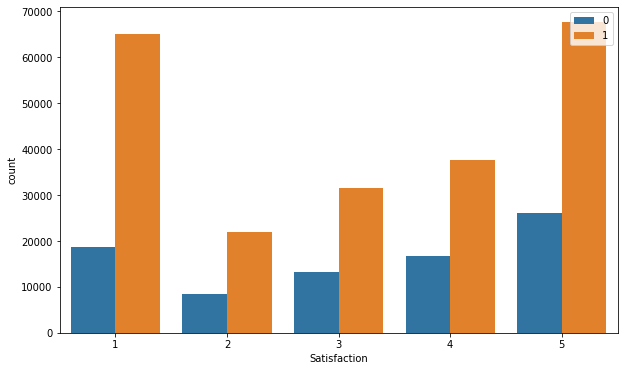

In [317]:
plt.figure(figsize=(10,6))
sns.countplot(x='Satisfaction', hue='Sex',data=df1)
plt.legend(loc='upper right')
plt.show()
#['Male':0,'Female':1]

# text mining

In [318]:
text = df_proc.Reviews

In [319]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [320]:
clean_text = text.apply(clean)

In [321]:
#stop words
stop_word = pd.read_csv(r'stop.txt', header=None)
st_word = [i for i in stop_word[0]]

In [322]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
my_stop_words = stop.copy()
#add some more stop words
for i in st_word:
    my_stop_words.append(i)

In [323]:
my_stop_words


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [324]:
len(st_word), len(stop), len(my_stop_words)

(571, 179, 750)

In [325]:
#setiment analysis
from textblob import TextBlob

In [326]:
df_text = pd.DataFrame({'Review':clean_text})

In [327]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_text['review_stop'] = df_text['Review'].apply(lambda x: ' '.join(word for word in x.split() if word not in my_stop_words))

In [328]:
#Lemmetisation
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lt = WordNetLemmatizer() 
df_text['review_clean']  = df_text['review_stop'] .apply(lambda x: " ".join([lt.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [329]:
from nltk.stem import SnowballStemmer
#Snow_ball = SnowballStemmer("english")
#df_text['review_clean']  = df_text['review_clean'] .apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [330]:
df_text


,Review,review_stop,review_clean
278403,folbee causes me to be dizzy and sleepy i cant...,folbee dizzy sleepy drive taking walk make qui...,folbee dizzy sleepy drive taking walk make qui...
278404,pernicious anemia,pernicious anemia,pernicious anemia
278405,this drug was prescribed due to a mutation in ...,drug prescribed due mutation mthfr gene caused...,drug prescribed due mutation mthfr gene caused...
278406,while this drug worked for my son to focus the...,drug worked son focus side effects weighed ben...,drug worked son focus side effect weighed bene...
278407,the drug was very effective for treating the u...,drug effective treating urinary symptoms libid...,drug effective treating urinary symptom libido...
...,...,...,...
362800,i goofedit was june of that i had my last ci...,goofedit june cigerette wrote previous text,goofedit june cigerette wrote previous text
362801,i took the whole weeksi could have stopped th...,weeksi stopped drug sooner thought id weeks we...,weeksi stopped drug sooner thought id week wei...
362803,as long as i was on chantix i didnt smoke ter...,long chantix didnt smoke terrible stomach upse...,long chantix didnt smoke terrible stomach upse...
362804,started this medication oct havent smoked fo...,started medication oct havent smoked weeks pla...,started medication oct havent smoked week plan...


In [331]:

#sentiments analysis

In [332]:
df_text.Review[278403]


'folbee causes me to be dizzy and sleepy i cant drive while taking it i can hardly walk i cannot make quick turns i fall down'

In [333]:
df_text.review_clean[278403]

'folbee dizzy sleepy drive taking walk make quick turn fall'

In [334]:
# its gives the polarity and subjectivity values
TextBlob(df_text.Review[278403]).sentiment

Sentiment(polarity=-0.03796296296296298, subjectivity=0.4435185185185185)

In [335]:
TextBlob(df_text.review_clean[278403]).sentiment

Sentiment(polarity=0.3333333333333333, subjectivity=0.5)

In [336]:
SentimentIntensityAnalyzer().polarity_scores(df_proc.Reviews[278403])

{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.2263}

In [337]:
SentimentIntensityAnalyzer().polarity_scores(df_text.review_clean[278403])

{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.2263}

In [338]:
import time
start= time.time()

In [339]:
df_text[['polarity', 'subjectivity']] = df_text['review_clean'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [340]:
end= time.time()

In [341]:
# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 134.13379645347595


In [342]:
df_text

,Review,review_stop,review_clean,polarity,subjectivity
278403,folbee causes me to be dizzy and sleepy i cant...,folbee dizzy sleepy drive taking walk make qui...,folbee dizzy sleepy drive taking walk make qui...,0.333333,0.500000
278404,pernicious anemia,pernicious anemia,pernicious anemia,0.000000,0.000000
278405,this drug was prescribed due to a mutation in ...,drug prescribed due mutation mthfr gene caused...,drug prescribed due mutation mthfr gene caused...,0.296667,0.596667
278406,while this drug worked for my son to focus the...,drug worked son focus side effects weighed ben...,drug worked son focus side effect weighed bene...,-0.125000,1.000000
278407,the drug was very effective for treating the u...,drug effective treating urinary symptoms libid...,drug effective treating urinary symptom libido...,0.600000,0.800000
...,...,...,...,...,...
362800,i goofedit was june of that i had my last ci...,goofedit june cigerette wrote previous text,goofedit june cigerette wrote previous text,-0.166667,0.166667
362801,i took the whole weeksi could have stopped th...,weeksi stopped drug sooner thought id weeks we...,weeksi stopped drug sooner thought id week wei...,-0.500000,1.000000
362803,as long as i was on chantix i didnt smoke ter...,long chantix didnt smoke terrible stomach upse...,long chantix didnt smoke terrible stomach upse...,-0.550000,0.766667
362804,started this medication oct havent smoked fo...,started medication oct havent smoked weeks pla...,started medication oct havent smoked week plan...,-0.359524,0.754762


In [343]:
start= time.time()

In [346]:
for index, row in df_text['review_clean'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= - 0.05:
        df_text.loc[index, 'sentiment'] = -1   #'negative'
    elif comp >= 0.05:
        df_text.loc[index, 'sentiment'] =  1   #'positive'
    else:
        df_text.loc[index, 'sentiment'] =  0    #'neutral'
    df_text.loc[index, 'neg'] = neg
    df_text.loc[index, 'neu'] = neu
    df_text.loc[index, 'pos'] = pos
    df_text.loc[index, 'compound'] = comp

In [347]:
end= time.time()

In [348]:
# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 8913.684725999832


In [349]:
# Label Encoding Drugname and Conditions
'''from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['Drug', 'Condition','Sides']:
    label_encoder_feat[feature] = LabelEncoder()
    df_text[feature] = label_encoder_feat[feature].fit_transform(df_proc[feature])'''

"from sklearn.preprocessing import LabelEncoder\nlabel_encoder_feat = {}\nfor feature in ['Drug', 'Condition','Sides']:\n    label_encoder_feat[feature] = LabelEncoder()\n    df_text[feature] = label_encoder_feat[feature].fit_transform(df_proc[feature])"

In [2]:
df_text.to_csv('df_Review_new.csv')

NameError: name 'df_text' is not defined

In [1]:
df_text.isnull()

NameError: name 'df_text' is not defined

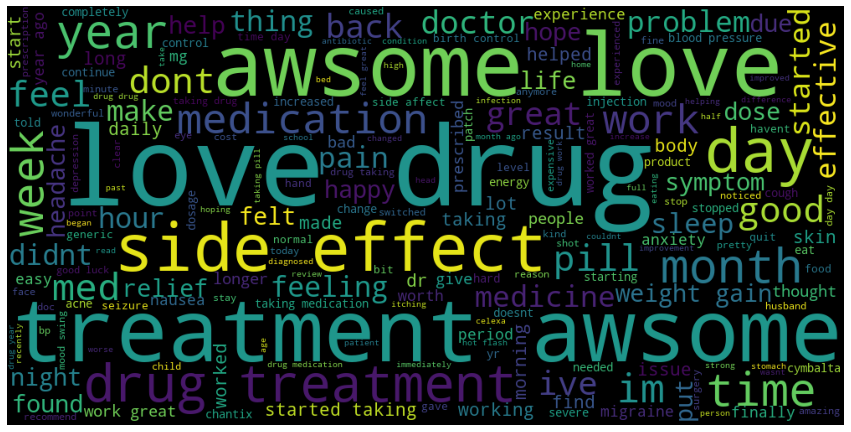

In [352]:
# Word cloud of the Clean reviews with +ve sentiments
df_rate_ten = df_text.loc[df_text.sentiment == 1., 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('positive sentiment.jpg')

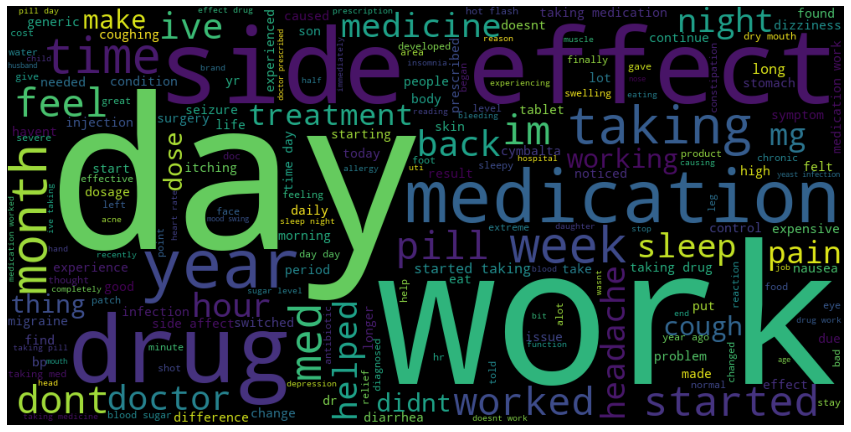

In [353]:
# Word cloud of the Clean reviews with neutral sentiments
df_rate_ten = df_text.loc[df_text.sentiment == 0, 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('neutral sentiment.jpg')

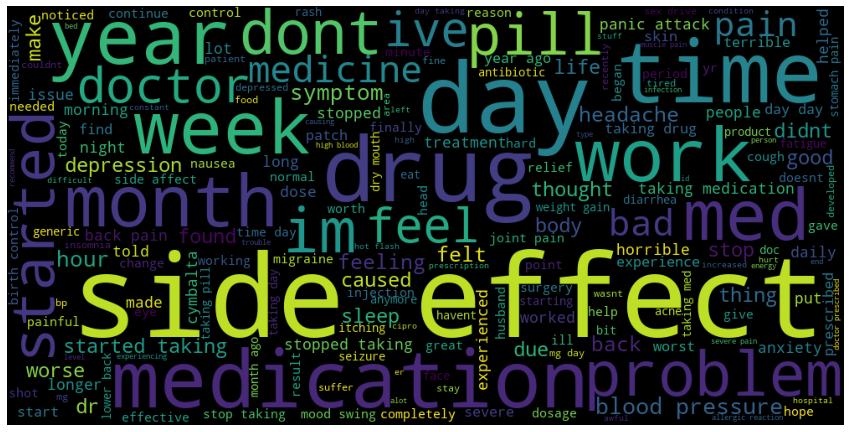

In [354]:
# Word cloud of the Clean reviews with -ve sentiments
df_rate_ten = df_text.loc[df_text.sentiment == -1., 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative sentiment.jpg')

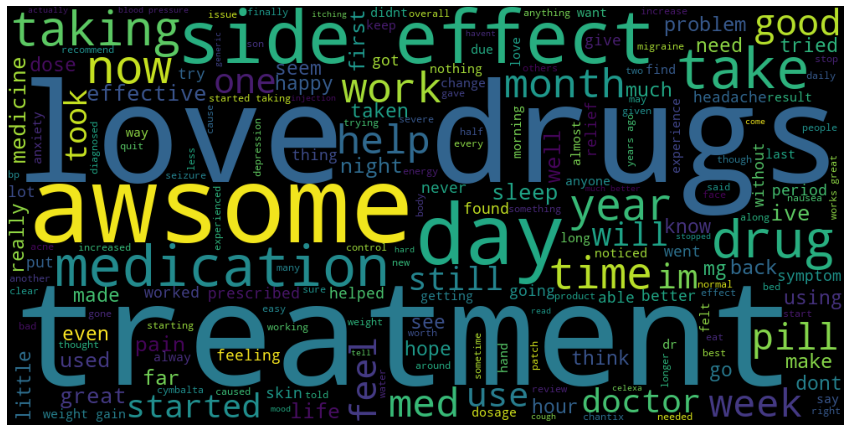

In [355]:
# Word cloud of the reviews with Satisfaction_rating equal to 1
df_rate_ten = df_text.loc[df_text.sentiment == 1., 'Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('positive_sentiment_Rev.jpg')

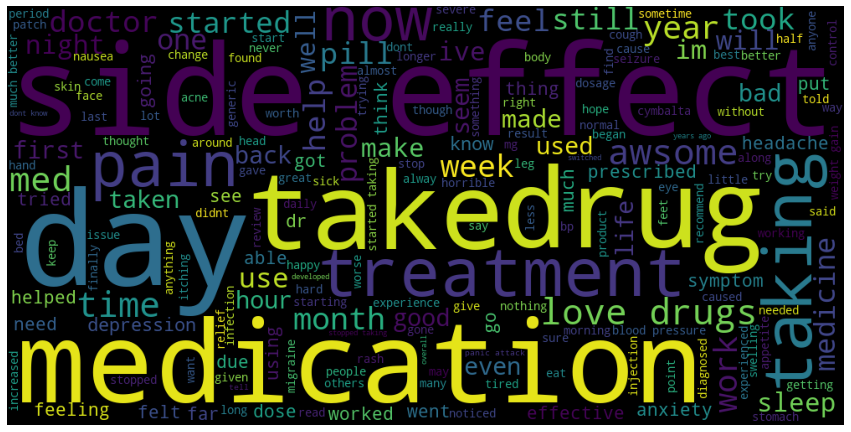

In [356]:
# Word cloud of the unclean reviews 
df_rate_ten = df_text['Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

plt.savefig('Review.jpg')

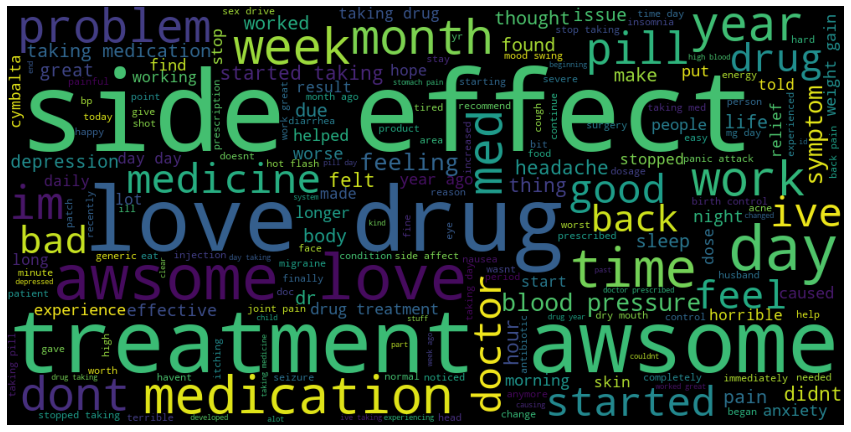

In [357]:
# Word cloud of the Clean reviews
df_rate_ten = df_text['review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

plt.savefig('clean_review.jpg')

In [422]:
df_text

,Review,review_stop,review_clean,polarity,subjectivity,sentiment,neg,neu,pos,compound
278403,folbee causes me to be dizzy and sleepy i cant...,folbee dizzy sleepy drive taking walk make qui...,folbee dizzy sleepy drive taking walk make qui...,0.333333,0.500000,-1.0,0.174,0.826,0.000,-0.2263
278404,pernicious anemia,pernicious anemia,pernicious anemia,0.000000,0.000000,0.0,0.000,1.000,0.000,0.0000
278405,this drug was prescribed due to a mutation in ...,drug prescribed due mutation mthfr gene caused...,drug prescribed due mutation mthfr gene caused...,0.296667,0.596667,1.0,0.000,0.687,0.313,0.7964
278406,while this drug worked for my son to focus the...,drug worked son focus side effects weighed ben...,drug worked son focus side effect weighed bene...,-0.125000,1.000000,1.0,0.112,0.587,0.301,0.7269
278407,the drug was very effective for treating the u...,drug effective treating urinary symptoms libid...,drug effective treating urinary symptom libido...,0.600000,0.800000,1.0,0.182,0.608,0.209,0.1027
...,...,...,...,...,...,...,...,...,...,...
362800,i goofedit was june of that i had my last ci...,goofedit june cigerette wrote previous text,goofedit june cigerette wrote previous text,-0.166667,0.166667,0.0,0.000,1.000,0.000,0.0000
362801,i took the whole weeksi could have stopped th...,weeksi stopped drug sooner thought id weeks we...,weeksi stopped drug sooner thought id week wei...,-0.500000,1.000000,-1.0,0.244,0.667,0.089,-0.3612
362803,as long as i was on chantix i didnt smoke ter...,long chantix didnt smoke terrible stomach upse...,long chantix didnt smoke terrible stomach upse...,-0.550000,0.766667,-1.0,0.325,0.518,0.157,-0.5921
362804,started this medication oct havent smoked fo...,started medication oct havent smoked weeks pla...,started medication oct havent smoked week plan...,-0.359524,0.754762,-1.0,0.321,0.586,0.093,-0.7650


In [359]:
#N-gram
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n2_words(corpus,ngram_range, n=None):
    vec1 = CountVectorizer(ngram_range=ngram_range,  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [360]:
top2_words = get_top_n2_words(df_text["review_clean"],ngram_range=(2,2), n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,side effect,13998
1,love drug,8458
2,treatment awsome,8373
3,awsome love,8373
4,blood pressure,2387


In [361]:
get_top_n2_words(df_text["review_clean"],ngram_range=(3,3), n=200) #trigram

[('treatment awsome love', 8373),
 ('awsome love drug', 8373),
 ('high blood pressure', 489),
 ('bad side effect', 349),
 ('side effect drug', 341),
 ('experienced side effect', 273),
 ('day side effect', 245),
 ('lower back pain', 228),
 ('side effect medication', 217),
 ('drug side effect', 204),
 ('started taking medication', 200),
 ('horrible side effect', 194),
 ('year side effect', 192),
 ('sexual side effect', 187),
 ('month side effect', 185),
 ('negative side effect', 169),
 ('severe side effect', 167),
 ('side effect ive', 167),
 ('side effect taking', 160),
 ('week side effect', 154),
 ('medication side effect', 154),
 ('work side effect', 146),
 ('side effect experienced', 140),
 ('birth control pill', 140),
 ('side effect worth', 129),
 ('started taking drug', 127),
 ('side effect bad', 124),
 ('dont side effect', 123),
 ('taking medication month', 121),
 ('side effect im', 121),
 ('terrible side effect', 118),
 ('lower blood pressure', 115),
 ('pain side effect', 113),
 (

In [362]:
get_top_n2_words(df_text["review_clean"],ngram_range=(1,1), n=200) #bigram

[('day', 24831),
 ('drug', 24555),
 ('taking', 20255),
 ('pain', 19802),
 ('side', 16353),
 ('effect', 16346),
 ('year', 15277),
 ('medication', 15253),
 ('time', 13241),
 ('month', 12612),
 ('week', 12415),
 ('treatment', 11332),
 ('work', 11199),
 ('feel', 9847),
 ('started', 9713),
 ('love', 9446),
 ('doctor', 9373),
 ('im', 9357),
 ('back', 8973),
 ('med', 8784),
 ('awsome', 8379),
 ('pill', 8044),
 ('ive', 7073),
 ('dont', 6762),
 ('problem', 6412),
 ('severe', 5839),
 ('night', 5750),
 ('bad', 5736),
 ('good', 5607),
 ('hour', 5592),
 ('sleep', 5430),
 ('medicine', 5390),
 ('life', 5074),
 ('worked', 4814),
 ('make', 4795),
 ('mg', 4772),
 ('blood', 4702),
 ('prescribed', 4594),
 ('headache', 4548),
 ('dose', 4416),
 ('great', 4322),
 ('felt', 4274),
 ('stomach', 4056),
 ('feeling', 4002),
 ('made', 3918),
 ('weight', 3888),
 ('dr', 3874),
 ('symptom', 3816),
 ('depression', 3710),
 ('helped', 3707),
 ('thing', 3659),
 ('ago', 3650),
 ('stopped', 3563),
 ('anxiety', 3529),
 ('did

In [363]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


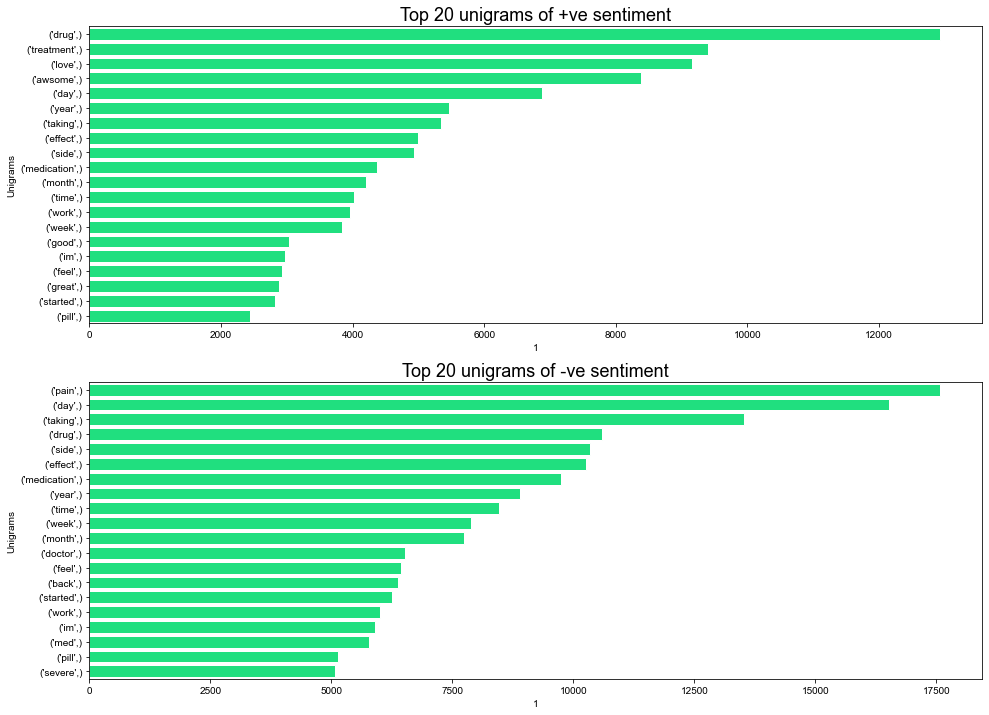

In [364]:

nltk.download('punkt')
# Top 20 unigrams according to the Satisfaction_rating
df_ = df_text[['sentiment', 'review_clean']]
df_['Reviews'] = df_text['review_clean'].str.replace("&#039;", "")
df_['Reviews'] = df_['Reviews'].str.replace(r'[^\w\d\s]',' ')

df_review_3 = " ".join(df_.loc[df_.sentiment == 1., 'review_clean'])
df_review_5 = " ".join(df_.loc[df_.sentiment == -1., 'review_clean'])

token_review_3 = word_tokenize(df_review_3)
token_review_5 = word_tokenize(df_review_5)

unigrams_3 = ngrams(token_review_3, 1)
unigrams_5 = ngrams(token_review_5, 1)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 unigrams of +ve sentiment")
sns_5.set_title("Top 20 unigrams of -ve sentiment")
sns_3.set_ylabel("Unigrams")
sns_5.set_ylabel("Unigrams")

plt.savefig('Unigram_20.jpg')

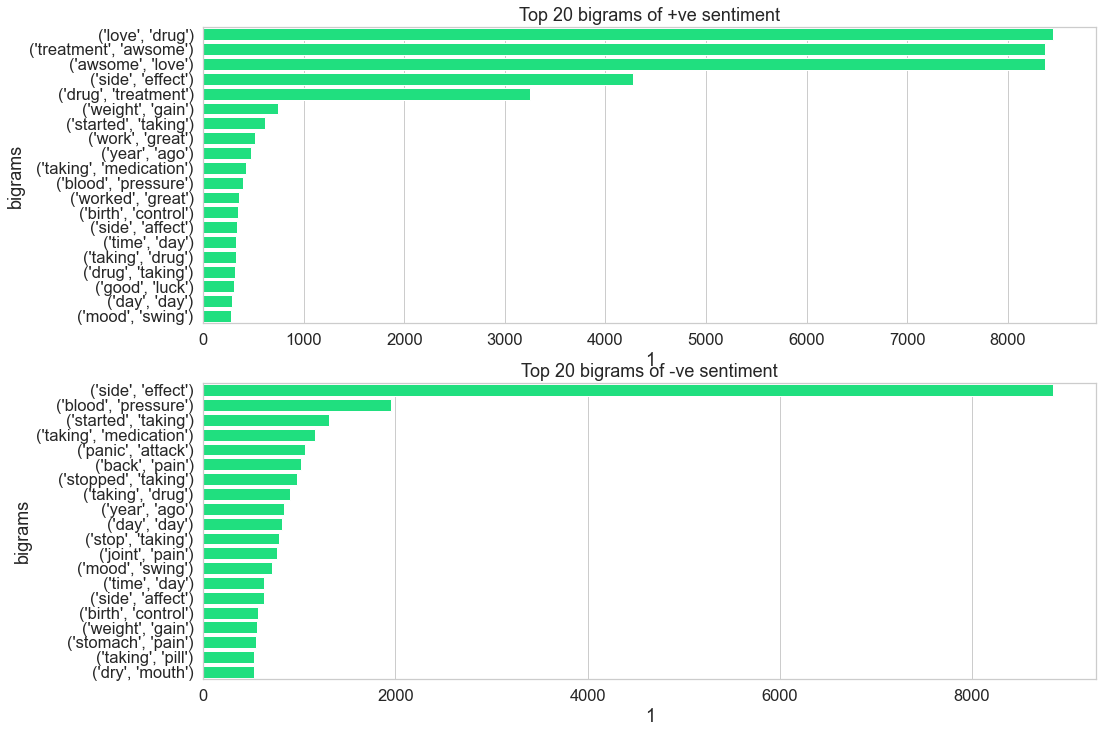

In [365]:
unigrams_3 = ngrams(token_review_3, 2)
unigrams_5 = ngrams(token_review_5, 2)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 bigrams of +ve sentiment")
sns_5.set_title("Top 20 bigrams of -ve sentiment")
sns_3.set_ylabel("bigrams")
sns_5.set_ylabel("bigrams")

plt.savefig('Biggram_20.jpg')

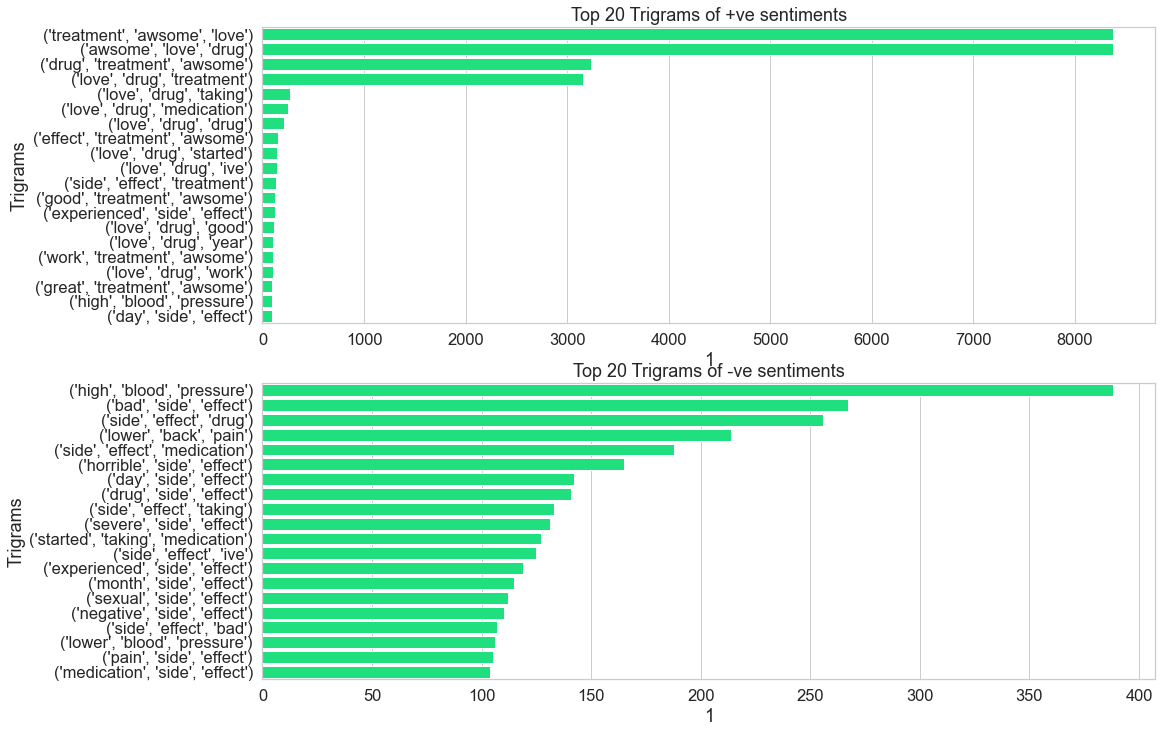

In [366]:
unigrams_3 = ngrams(token_review_3, 3)
unigrams_5 = ngrams(token_review_5, 3)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 Trigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 Trigrams of +ve sentiments")
sns_5.set_title("Top 20 Trigrams of -ve sentiments")
sns_3.set_ylabel("Trigrams")
sns_5.set_ylabel("Trigrams");

plt.savefig('Trigram_20.jpg')

In [4]:
df_text1 = pd.read_csv('df_Review_new.csv')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=1500,analyzer='word')
x = tv.fit_transform(df_text1['review_clean'].values.astype('U'))

In [6]:
len(tv.get_feature_names())

1500

In [7]:
df_text1

,Unnamed: 0,Review,review_stop,review_clean,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,278403,folbee causes me to be dizzy and sleepy i cant...,folbee dizzy sleepy drive taking walk make qui...,folbee dizzy sleepy drive taking walk make qui...,0.333333,0.500000,-1.0,0.174,0.826,0.000,-0.2263
1,278404,pernicious anemia,pernicious anemia,pernicious anemia,0.000000,0.000000,0.0,0.000,1.000,0.000,0.0000
2,278405,this drug was prescribed due to a mutation in ...,drug prescribed due mutation mthfr gene caused...,drug prescribed due mutation mthfr gene caused...,0.296667,0.596667,1.0,0.000,0.687,0.313,0.7964
3,278406,while this drug worked for my son to focus the...,drug worked son focus side effects weighed ben...,drug worked son focus side effect weighed bene...,-0.125000,1.000000,1.0,0.112,0.587,0.301,0.7269
4,278407,the drug was very effective for treating the u...,drug effective treating urinary symptoms libid...,drug effective treating urinary symptom libido...,0.600000,0.800000,1.0,0.182,0.608,0.209,0.1027
...,...,...,...,...,...,...,...,...,...,...,...
69995,362800,i goofedit was june of that i had my last ci...,goofedit june cigerette wrote previous text,goofedit june cigerette wrote previous text,-0.166667,0.166667,0.0,0.000,1.000,0.000,0.0000
69996,362801,i took the whole weeksi could have stopped th...,weeksi stopped drug sooner thought id weeks we...,weeksi stopped drug sooner thought id week wei...,-0.500000,1.000000,-1.0,0.244,0.667,0.089,-0.3612
69997,362803,as long as i was on chantix i didnt smoke ter...,long chantix didnt smoke terrible stomach upse...,long chantix didnt smoke terrible stomach upse...,-0.550000,0.766667,-1.0,0.325,0.518,0.157,-0.5921
69998,362804,started this medication oct havent smoked fo...,started medication oct havent smoked weeks pla...,started medication oct havent smoked week plan...,-0.359524,0.754762,-1.0,0.321,0.586,0.093,-0.7650


In [8]:
df_text1.sentiment.value_counts()

-1.0    35530
 1.0    26157
 0.0     8313
Name: sentiment, dtype: int64

In [9]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=1500, analyzer='word')
x = tv.fit_transform(df_text1['review_clean'].values.astype('U'))'''


"from sklearn.feature_extraction.text import TfidfVectorizer\ntv = TfidfVectorizer(max_features=1500, analyzer='word')\nx = tv.fit_transform(df_text1['review_clean'].values.astype('U'))"

In [10]:
count_final_RS=pd.DataFrame(x.toarray(),columns= tv.get_feature_names())

In [11]:
count_final_RS

,abdomen,abdominal,ability,absolutely,accident,ache,aching,acid,acne,acting,...,year,yeast,yesterday,yogurt,young,youre,yr,zap,zoloft,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#count_final_RS['sentiment']=df_text1.sentiment

In [13]:

count_final_RS

,abdomen,abdominal,ability,absolutely,accident,ache,aching,acid,acne,acting,...,year,yeast,yesterday,yogurt,young,youre,yr,zap,zoloft,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [433]:
count_final_RS.to_csv('final_vec_Sen.csv')

In [434]:
joblib.dump(tv, 'tv_Deployment.pkl')

['tv_Deployment.pkl']

In [18]:
X=count_final_RS

In [16]:
y=df_text1['sentiment']

In [17]:
y.shape

(70000,)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

In [467]:
#acc=modelAccuracy(models,x,y,0)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from lightgbm import LGBMClassifier
# Training Model - I
clf1 = LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model1 = clf1.fit(X_train, Y_train)

# Predictions
predictions1 = model1.predict(X_test)
print ("The Accuracy of the train_data is : ", model1.score(X_train, Y_train))
print ("The Accuracy of the model is : ", accuracy_score(Y_test, predictions1))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


The Accuracy of the train_data is :  0.9664897959183674
The Accuracy of the model is :  0.9024285714285715


In [22]:
Y_test.value_counts()

-1.0    10735
 1.0     7802
 0.0     2463
Name: sentiment, dtype: int64

In [23]:
predictions1
y=pd.Series(predictions1)

In [24]:
y.value_counts()

-1.0    11067
 1.0     7457
 0.0     2476
dtype: int64

In [25]:
result= pd.DataFrame({'Y_test':Y_test, 'Predict':predictions1})
result

,Y_test,Predict
46730,1.0,0.0
48393,-1.0,-1.0
41416,1.0,1.0
34506,-1.0,-1.0
43725,-1.0,-1.0
...,...,...
1216,1.0,1.0
19036,1.0,1.0
51256,1.0,1.0
48198,-1.0,-1.0


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [27]:
confusion_matrix(Y_test,predictions1)

array([[10019,   192,   524],
       [  228,  2117,   118],
       [  820,   167,  6815]], dtype=int64)

In [28]:
print(classification_report(Y_test,predictions1))

              precision    recall  f1-score   support

        -1.0       0.91      0.93      0.92     10735
         0.0       0.86      0.86      0.86      2463
         1.0       0.91      0.87      0.89      7802

    accuracy                           0.90     21000
   macro avg       0.89      0.89      0.89     21000
weighted avg       0.90      0.90      0.90     21000



<AxesSubplot:>

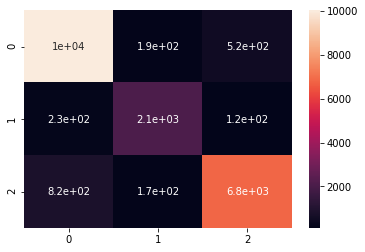

In [29]:
sns.heatmap(confusion_matrix(Y_test,y),annot=True)

In [33]:
# Training Model - 2
clf2 = XGBClassifier(n_estimator = 1000,
                   learning_rate=0.10,
                   num_leaves=30)
model2 = clf2.fit(X_train, Y_train)

# Predictions
predictions2 = model2.predict(X_test)
print ("The Accuracy of the train_data is : ", model2.score(X_train, Y_train))
print ("The Accuracy of the model2 is : ", accuracy_score(Y_test, predictions2))

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Accuracy of the train_data is :  0.8427755102040816
The Accuracy of the model2 is :  0.8135238095238095


In [35]:
confusion_matrix(Y_test,predictions2)

array([[9936,  271,  528],
       [ 883, 1493,   87],
       [1920,  227, 5655]], dtype=int64)

In [37]:
print(classification_report(Y_test,predictions2))

              precision    recall  f1-score   support

        -1.0       0.78      0.93      0.85     10735
         0.0       0.75      0.61      0.67      2463
         1.0       0.90      0.72      0.80      7802

    accuracy                           0.81     21000
   macro avg       0.81      0.75      0.77     21000
weighted avg       0.82      0.81      0.81     21000



In [34]:
# Training Model - 3
clf3 = KNeighborsClassifier()
model3 = clf3.fit(X_train, Y_train)

# Predictions
predictions3 = model3.predict(X_test)
print ("The Accuracy of the train_data is : ", model3.score(X_train, Y_train))
print ("The Accuracy of the model3 is : ", accuracy_score(Y_test, predictions3))

The Accuracy of the train_data is :  0.48644897959183675
The Accuracy of the model3 is :  0.39061904761904764


In [36]:
confusion_matrix(Y_test,predictions3)

array([[2659, 7894,  182],
       [ 236, 2149,   78],
       [ 407, 4000, 3395]], dtype=int64)

In [38]:
print(classification_report(Y_test,predictions3))

              precision    recall  f1-score   support

        -1.0       0.81      0.25      0.38     10735
         0.0       0.15      0.87      0.26      2463
         1.0       0.93      0.44      0.59      7802

    accuracy                           0.39     21000
   macro avg       0.63      0.52      0.41     21000
weighted avg       0.77      0.39      0.44     21000



In [30]:

# Training Model - 4
from sklearn import linear_model
clf4 = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model4 = clf4.fit(X_train, Y_train)

# Predictions
predictions4 = model4.predict(X_test)
print ("The Accuracy of the train_data is : ", model4.score(X_train, Y_train))
print ("The Accuracy of the model4 is : ", accuracy_score(Y_test, predictions4))

The Accuracy of the train_data is :  0.9066938775510204
The Accuracy of the model4 is :  0.8934761904761904


In [31]:
confusion_matrix(Y_test,predictions4)

array([[10121,   157,   457],
       [  404,  1908,   151],
       [  906,   162,  6734]], dtype=int64)

In [39]:
print(classification_report(Y_test,predictions4))

              precision    recall  f1-score   support

        -1.0       0.89      0.94      0.91     10735
         0.0       0.86      0.77      0.81      2463
         1.0       0.92      0.86      0.89      7802

    accuracy                           0.89     21000
   macro avg       0.89      0.86      0.87     21000
weighted avg       0.89      0.89      0.89     21000



In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
num_folds =40
kfold = KFold(n_splits=40)

results = cross_val_score(model4,X, df_text1['sentiment'] ,cv=kfold)

In [45]:
results.mean()

0.8951571428571427